In [1]:
import pandas as pd
import numpy as np

In [2]:
#in results.pkl ci sono le labels e le probabilità di ogni classe calcolate dal modello per ciascuna riga
results=pd.read_pickle('cv_notino.pkl')

In [3]:
results.isnull().sum().sum()

0

In [4]:
#Funzioni di supporto
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def print_scores(test_labels, test_probs, ):
    print('\nClassification Report\n')
    classes = ["Ortorombic","Tetragonal","Monoclinic","Trigonal","Hexagonal","Triclinic","Cubic"]
    print(classification_report(labels, preds, target_names=classes))
    accuracy = accuracy_score(labels, preds)
    print('\nAccuracy: {:.2f}\n'.format(accuracy))

    print('Micro Precision: {:.2f}'.format(precision_score(labels, preds, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(labels, preds, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(labels, preds, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(labels, preds, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(labels, preds, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(labels, preds, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(labels, preds, average='weighted')))
    cm=confusion_matrix(labels, preds)
    plot_confusion_matrix(cm,target_names=classes, normalize=True,)
    return accuracy

In [5]:
labels = results['class'].values
labels=labels.astype(int)
probabilities=results[[0,1,2,3,4,5,6]]

In [6]:
probabilities

,0,1,2,3,4,5,6
0,9.055120e-01,6.106065e-03,0.022346,6.538550e-02,2.313682e-04,0.000389,3.022292e-05
1,2.609873e-04,2.041247e-09,0.555866,1.734708e-09,1.490549e-08,0.443872,3.411647e-12
2,6.052624e-03,5.412632e-05,0.466460,9.439965e-06,2.413818e-05,0.527400,6.215525e-08
3,4.433572e-05,5.279644e-05,0.016328,2.055300e-06,1.551342e-06,0.983571,6.827797e-10
4,3.773078e-11,2.264737e-14,0.000100,1.176791e-15,2.740904e-16,0.999900,8.519908e-22
...,...,...,...,...,...,...,...
319436,5.137500e-02,1.387486e-06,0.931521,3.723467e-07,9.806648e-06,0.017092,1.545828e-08
319437,2.619228e-01,4.867327e-03,0.638621,1.554061e-03,1.110826e-02,0.081913,1.413028e-05
319438,2.092456e-04,1.167844e-05,0.045770,3.849736e-05,9.589096e-06,0.953961,1.599493e-07
319439,1.428945e-04,1.059003e-06,0.060701,3.630414e-06,1.272640e-06,0.939150,1.372303e-08


In [7]:
preds = probabilities.apply(np.argmax, axis=1).values

In [8]:
print('\nClassification Report\n')
classes=["Ortorombic","Tetragonal","Monoclinic","Trigonal","Hexagonal","Triclinic","Cubic"]
print(classification_report(labels, preds, target_names=classes))


Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.51      0.56      0.54     50929
  Tetragonal       0.56      0.52      0.54      7090
  Monoclinic       0.69      0.61      0.65    165878
    Trigonal       0.62      0.55      0.59      5873
   Hexagonal       0.52      0.27      0.35      1678
   Triclinic       0.57      0.67      0.62     86064
       Cubic       0.83      0.84      0.84      1927

    accuracy                           0.62    319439
   macro avg       0.61      0.58      0.59    319439
weighted avg       0.62      0.62      0.62    319439



In [9]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(labels, preds)))

print('Micro Precision: {:.2f}'.format(precision_score(labels, preds, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(labels, preds, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(labels, preds, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(labels, preds, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(labels, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(labels, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(labels, preds, average='weighted')))


Accuracy: 0.62

Micro Precision: 0.62
Micro Recall: 0.62
Micro F1-score: 0.62

Macro Precision: 0.61
Macro Recall: 0.58
Macro F1-score: 0.59

Weighted Precision: 0.62
Weighted Recall: 0.62
Weighted F1-score: 0.62


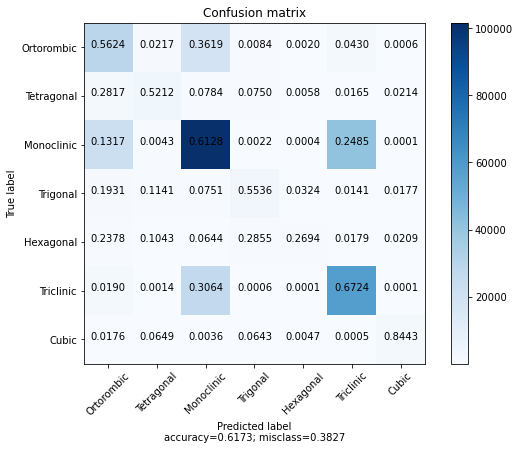

[[ 28640   1104  18430    430    103   2192     30]
 [  1997   3695    556    532     41    117    152]
 [ 21851    713 101658    360     65  41219     12]
 [  1134    670    441   3251    190     83    104]
 [   399    175    108    479    452     30     35]
 [  1632    120  26374     53      9  57868      8]
 [    34    125      7    124      9      1   1627]]


In [10]:
cm=confusion_matrix(labels, preds)
plot_confusion_matrix(cm,target_names=classes, normalize=True,)
print(cm)

---

## Confidence 

In [11]:
#Proviamo a droppare le righe nelle quali la differenza tra la prima probavilità e la seconda è minore
#di una soglia 
confidence = pd.DataFrame(columns=[['Threshold', 'Accuracy','% dropped']])
results=pd.read_pickle('cv_notino_conf.pkl')
results

,class,0,1,2,3,4,5,6,conf
0,0,9.055120e-01,6.106065e-03,0.022346,6.538550e-02,2.313682e-04,0.000389,3.022292e-05,0.840127
1,2,2.609873e-04,2.041247e-09,0.555866,1.734708e-09,1.490549e-08,0.443872,3.411647e-12,0.111994
2,2,6.052624e-03,5.412632e-05,0.466460,9.439965e-06,2.413818e-05,0.527400,6.215525e-08,0.060940
3,5,4.433572e-05,5.279644e-05,0.016328,2.055300e-06,1.551342e-06,0.983571,6.827797e-10,0.967243
4,5,3.773078e-11,2.264737e-14,0.000100,1.176791e-15,2.740904e-16,0.999900,8.519908e-22,0.999799
...,...,...,...,...,...,...,...,...,...
319436,2,5.137500e-02,1.387486e-06,0.931521,3.723467e-07,9.806648e-06,0.017092,1.545828e-08,0.880146
319437,2,2.619228e-01,4.867327e-03,0.638621,1.554061e-03,1.110826e-02,0.081913,1.413028e-05,0.376698
319438,2,2.092456e-04,1.167844e-05,0.045770,3.849736e-05,9.589096e-06,0.953961,1.599493e-07,0.908191
319439,5,1.428945e-04,1.059003e-06,0.060701,3.630414e-06,1.272640e-06,0.939150,1.372303e-08,0.878449


<AxesSubplot:ylabel='Frequency'>

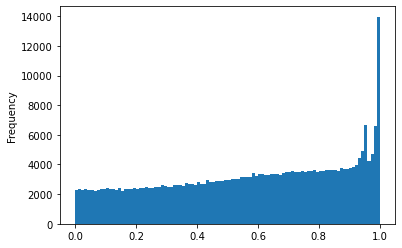

In [12]:
%matplotlib inline
results['conf'].plot.hist(bins=100)

************************************
THRESHOLD 0  INDEXES TO DROP:  0
LEN FILTERED  319439
LEN UNFILTERED  319439
Percentuale casi eliminati 0.0 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.51      0.56      0.54     50929
  Tetragonal       0.56      0.52      0.54      7090
  Monoclinic       0.69      0.61      0.65    165878
    Trigonal       0.62      0.55      0.59      5873
   Hexagonal       0.52      0.27      0.35      1678
   Triclinic       0.57      0.67      0.62     86064
       Cubic       0.83      0.84      0.84      1927

    accuracy                           0.62    319439
   macro avg       0.61      0.58      0.59    319439
weighted avg       0.62      0.62      0.62    319439


Accuracy: 0.62

Micro Precision: 0.62
Micro Recall: 0.62
Micro F1-score: 0.62

Macro Precision: 0.61
Macro Recall: 0.58
Macro F1-score: 0.59

Weighted Precision: 0.62
Weighted Recall: 0.62
Weighted F1-score: 0.62


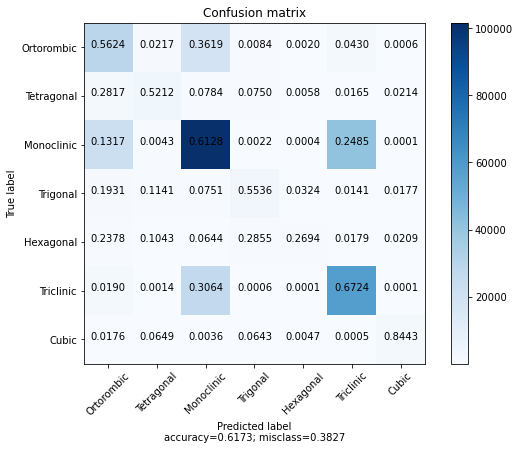

************************************
THRESHOLD 0.1  INDEXES TO DROP:  23017
LEN FILTERED  296422
LEN UNFILTERED  319439
Percentuale casi eliminati 7.21 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.53      0.57      0.55     47278
  Tetragonal       0.58      0.54      0.56      6660
  Monoclinic       0.70      0.62      0.66    152778
    Trigonal       0.64      0.57      0.60      5528
   Hexagonal       0.55      0.28      0.37      1560
   Triclinic       0.58      0.69      0.63     80727
       Cubic       0.83      0.86      0.84      1891

    accuracy                           0.63    296422
   macro avg       0.63      0.59      0.60    296422
weighted avg       0.64      0.63      0.63    296422


Accuracy: 0.63

Micro Precision: 0.63
Micro Recall: 0.63
Micro F1-score: 0.63

Macro Precision: 0.63
Macro Recall: 0.59
Macro F1-score: 0.60

Weighted Precision: 0.64
Weighted Recall: 0.63
Weighted F1-score: 0.63


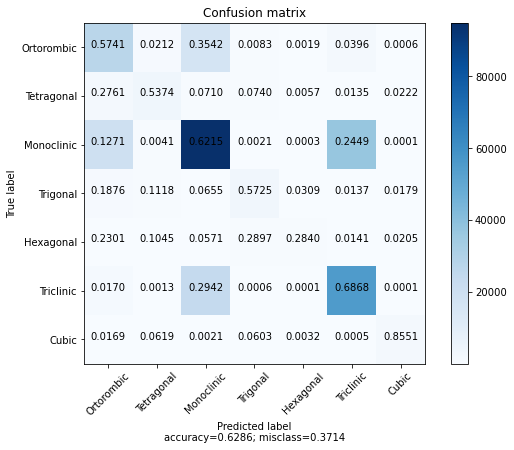

************************************
THRESHOLD 0.2  INDEXES TO DROP:  46391
LEN FILTERED  273048
LEN UNFILTERED  319439
Percentuale casi eliminati 14.52 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.55      0.59      0.57     43554
  Tetragonal       0.59      0.55      0.57      6279
  Monoclinic       0.70      0.63      0.66    139303
    Trigonal       0.65      0.59      0.62      5192
   Hexagonal       0.57      0.30      0.39      1443
   Triclinic       0.60      0.70      0.65     75405
       Cubic       0.83      0.86      0.85      1872

    accuracy                           0.64    273048
   macro avg       0.64      0.60      0.62    273048
weighted avg       0.65      0.64      0.64    273048


Accuracy: 0.64

Micro Precision: 0.64
Micro Recall: 0.64
Micro F1-score: 0.64

Macro Precision: 0.64
Macro Recall: 0.60
Macro F1-score: 0.62

Weighted Precision: 0.65
Weighted Recall: 0.64
Weighted F1-score: 0.64


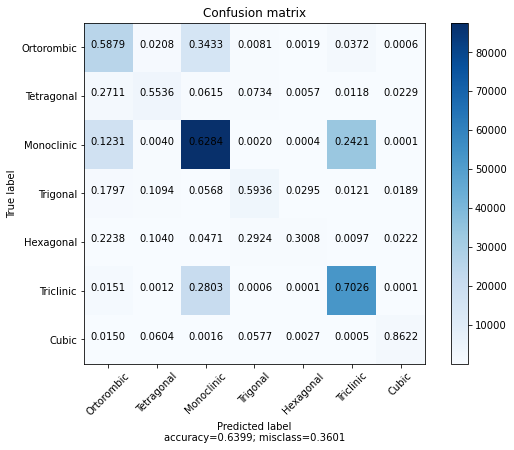

************************************
THRESHOLD 0.3  INDEXES TO DROP:  71012
LEN FILTERED  248427
LEN UNFILTERED  319439
Percentuale casi eliminati 22.23 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.56      0.61      0.58     39570
  Tetragonal       0.61      0.58      0.59      5828
  Monoclinic       0.71      0.63      0.67    125196
    Trigonal       0.66      0.62      0.64      4857
   Hexagonal       0.58      0.31      0.41      1350
   Triclinic       0.61      0.72      0.66     69777
       Cubic       0.84      0.87      0.85      1849

    accuracy                           0.65    248427
   macro avg       0.66      0.62      0.63    248427
weighted avg       0.66      0.65      0.65    248427


Accuracy: 0.65

Micro Precision: 0.65
Micro Recall: 0.65
Micro F1-score: 0.65

Macro Precision: 0.66
Macro Recall: 0.62
Macro F1-score: 0.63

Weighted Precision: 0.66
Weighted Recall: 0.65
Weighted F1-score: 0.65


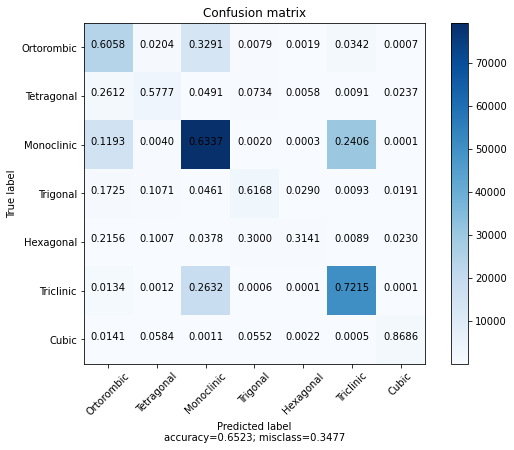

************************************
THRESHOLD 0.4  INDEXES TO DROP:  97156
LEN FILTERED  222283
LEN UNFILTERED  319439
Percentuale casi eliminati 30.41 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.58      0.63      0.60     35497
  Tetragonal       0.63      0.60      0.61      5420
  Monoclinic       0.72      0.64      0.68    109982
    Trigonal       0.67      0.64      0.66      4553
   Hexagonal       0.61      0.33      0.42      1249
   Triclinic       0.63      0.74      0.68     63758
       Cubic       0.85      0.88      0.86      1824

    accuracy                           0.67    222283
   macro avg       0.67      0.64      0.65    222283
weighted avg       0.67      0.67      0.66    222283


Accuracy: 0.67

Micro Precision: 0.67
Micro Recall: 0.67
Micro F1-score: 0.67

Macro Precision: 0.67
Macro Recall: 0.64
Macro F1-score: 0.65

Weighted Precision: 0.67
Weighted Recall: 0.67
Weighted F1-score: 0.66


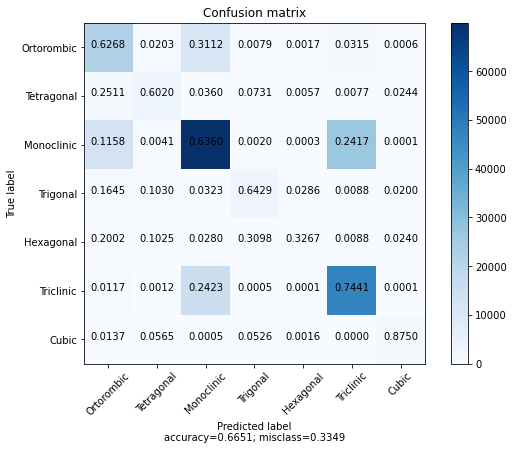

************************************
THRESHOLD 0.5  INDEXES TO DROP:  125582
LEN FILTERED  193857
LEN UNFILTERED  319439
Percentuale casi eliminati 39.31 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.61      0.66      0.63     31078
  Tetragonal       0.65      0.63      0.64      4996
  Monoclinic       0.74      0.63      0.68     93588
    Trigonal       0.69      0.67      0.68      4220
   Hexagonal       0.63      0.35      0.45      1148
   Triclinic       0.65      0.77      0.70     57041
       Cubic       0.85      0.89      0.87      1786

    accuracy                           0.68    193857
   macro avg       0.69      0.66      0.66    193857
weighted avg       0.69      0.68      0.68    193857


Accuracy: 0.68

Micro Precision: 0.68
Micro Recall: 0.68
Micro F1-score: 0.68

Macro Precision: 0.69
Macro Recall: 0.66
Macro F1-score: 0.66

Weighted Precision: 0.69
Weighted Recall: 0.68
Weighted F1-score: 0.68


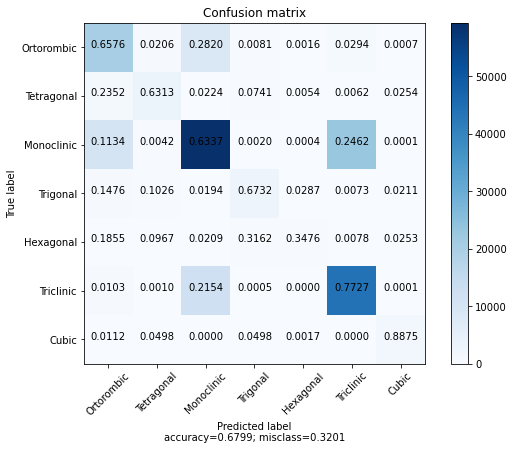

************************************
THRESHOLD 0.6  INDEXES TO DROP:  156948
LEN FILTERED  162491
LEN UNFILTERED  319439
Percentuale casi eliminati 49.13 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.63      0.70      0.67     26201
  Tetragonal       0.67      0.66      0.66      4554
  Monoclinic       0.75      0.62      0.68     75161
    Trigonal       0.70      0.70      0.70      3913
   Hexagonal       0.66      0.37      0.47      1049
   Triclinic       0.66      0.81      0.73     49855
       Cubic       0.85      0.89      0.87      1758

    accuracy                           0.70    162491
   macro avg       0.70      0.68      0.68    162491
weighted avg       0.70      0.70      0.69    162491


Accuracy: 0.70

Micro Precision: 0.70
Micro Recall: 0.70
Micro F1-score: 0.70

Macro Precision: 0.70
Macro Recall: 0.68
Macro F1-score: 0.68

Weighted Precision: 0.70
Weighted Recall: 0.70
Weighted F1-score: 0.69


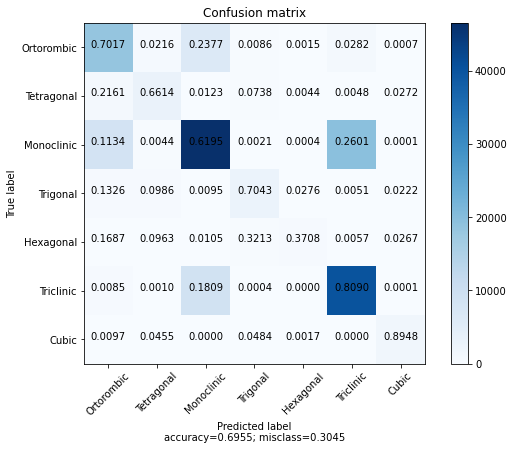

************************************
THRESHOLD 0.7  INDEXES TO DROP:  190459
LEN FILTERED  128980
LEN UNFILTERED  319439
Percentuale casi eliminati 59.62 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.66      0.76      0.71     21208
  Tetragonal       0.69      0.69      0.69      4156
  Monoclinic       0.77      0.59      0.67     55342
    Trigonal       0.72      0.73      0.73      3582
   Hexagonal       0.69      0.40      0.51       949
   Triclinic       0.69      0.86      0.76     42024
       Cubic       0.86      0.91      0.88      1719

    accuracy                           0.71    128980
   macro avg       0.73      0.70      0.71    128980
weighted avg       0.72      0.71      0.71    128980


Accuracy: 0.71

Micro Precision: 0.71
Micro Recall: 0.71
Micro F1-score: 0.71

Macro Precision: 0.73
Macro Recall: 0.70
Macro F1-score: 0.71

Weighted Precision: 0.72
Weighted Recall: 0.71
Weighted F1-score: 0.71


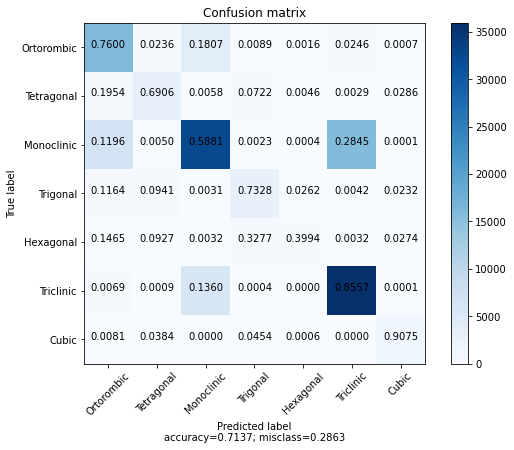

************************************
THRESHOLD 0.8  INDEXES TO DROP:  225888
LEN FILTERED  93551
LEN UNFILTERED  319439
Percentuale casi eliminati 70.71 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.69      0.83      0.75     15974
  Tetragonal       0.72      0.73      0.72      3674
  Monoclinic       0.80      0.52      0.63     34661
    Trigonal       0.74      0.77      0.75      3226
   Hexagonal       0.73      0.43      0.54       860
   Triclinic       0.72      0.91      0.80     33476
       Cubic       0.87      0.92      0.89      1680

    accuracy                           0.74     93551
   macro avg       0.75      0.73      0.73     93551
weighted avg       0.75      0.74      0.72     93551


Accuracy: 0.74

Micro Precision: 0.74
Micro Recall: 0.74
Micro F1-score: 0.74

Macro Precision: 0.75
Macro Recall: 0.73
Macro F1-score: 0.73

Weighted Precision: 0.75
Weighted Recall: 0.74
Weighted F1-score: 0.72


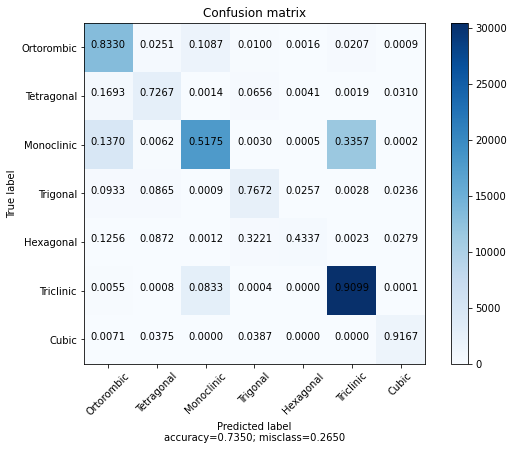

************************************
THRESHOLD 0.9  INDEXES TO DROP:  262326
LEN FILTERED  57113
LEN UNFILTERED  319439
Percentuale casi eliminati 82.12 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.74      0.91      0.81     10422
  Tetragonal       0.76      0.79      0.77      3036
  Monoclinic       0.84      0.35      0.50     15300
    Trigonal       0.77      0.82      0.80      2739
   Hexagonal       0.77      0.49      0.60       715
   Triclinic       0.76      0.97      0.85     23291
       Cubic       0.88      0.93      0.90      1610

    accuracy                           0.77     57113
   macro avg       0.79      0.75      0.75     57113
weighted avg       0.78      0.77      0.74     57113


Accuracy: 0.77

Micro Precision: 0.77
Micro Recall: 0.77
Micro F1-score: 0.77

Macro Precision: 0.79
Macro Recall: 0.75
Macro F1-score: 0.75

Weighted Precision: 0.78
Weighted Recall: 0.77
Weighted F1-score: 0.74


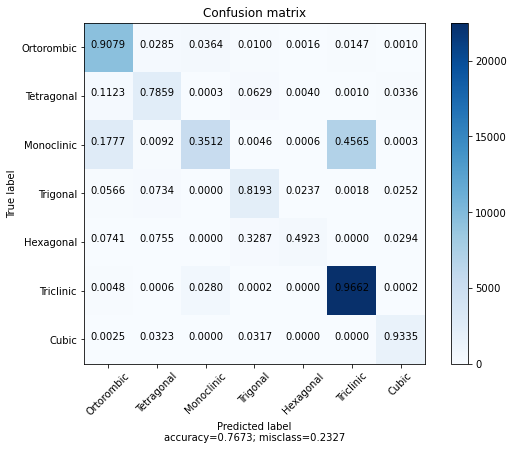

In [13]:
for thr_value in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    threshold=thr_value
    indexes_to_drop=[]
    count=0
    for index, row in results.iterrows():
        conf = row['conf']
        if conf <= threshold:
            indexes_to_drop.append(index)
    print('************************************')
    print('THRESHOLD', threshold, ' INDEXES TO DROP: ', len(indexes_to_drop))
    filtered_results = results[~results.index.isin(indexes_to_drop)].copy()
    print('LEN FILTERED ', len(filtered_results))
    print('LEN UNFILTERED ', len(results))
    percent_dropped = round(len(indexes_to_drop)/len(results)*100, 2)
    print("Percentuale casi eliminati", percent_dropped,"%")
    labels = filtered_results['class'].values
    labels=labels.astype(int)
    probabilities=filtered_results[[0,1,2,3,4,5,6]]
    preds = probabilities.apply(np.argmax, axis=1).values
    accuracy = print_scores(labels, preds)
    thr = len(confidence)
    confidence.loc[thr]=[threshold, accuracy, percent_dropped]

---

In [14]:
confidence

,Threshold,Accuracy,% dropped
0,0.0,0.617304,0.00
1,0.1,0.628617,7.21
2,0.2,0.639902,14.52
3,0.3,0.652320,22.23
4,0.4,0.665062,30.41
5,0.5,0.679883,39.31
6,0.6,0.695497,49.13
7,0.7,0.713715,59.62
8,0.8,0.735011,70.71
9,0.9,0.767303,82.12
